In [1]:

from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("/content/Zoo.csv")
df

animal name  hair  feathers  eggs  ...  tail  domestic  catsize  type
0      aardvark     1         0     0  ...     0         0        1     1
1      antelope     1         0     0  ...     1         0        1     1
2          bass     0         0     1  ...     1         0        0     4
3          bear     1         0     0  ...     0         0        1     1
4          boar     1         0     0  ...     1         0        1     1
..          ...   ...       ...   ...  ...   ...       ...      ...   ...
96      wallaby     1         0     0  ...     1         0        1     1
97         wasp     1         0     1  ...     0         0        0     6
98         wolf     1         0     0  ...     1         0        1     1
99         worm     0         0     1  ...     0         0        0     7
100        wren     0         1     1  ...     1         0        0     2

[101 rows x 18 columns]

In [3]:
df.shape

(101, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


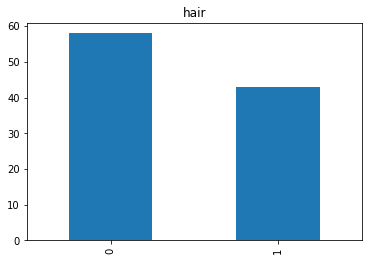

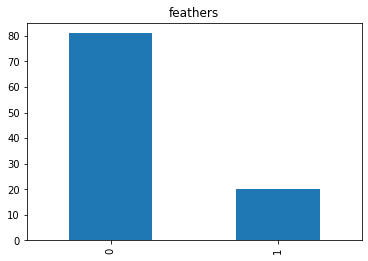

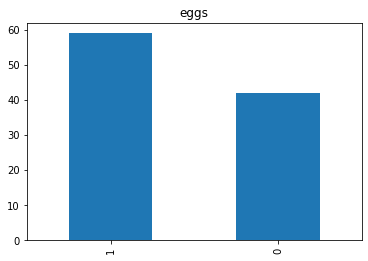

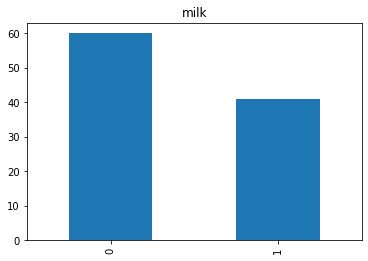

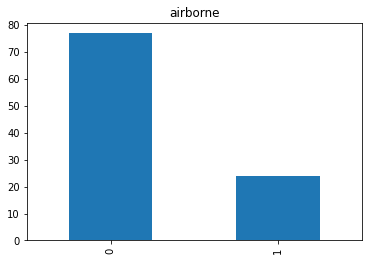

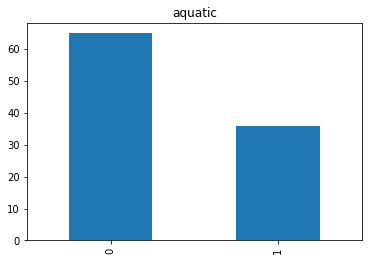

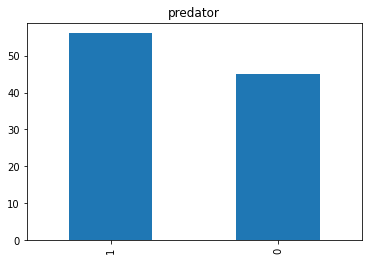

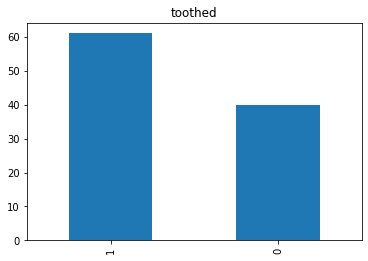

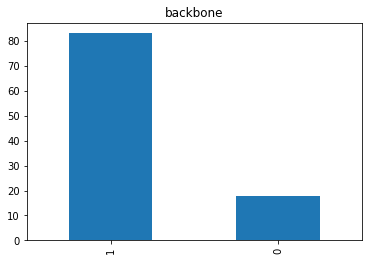

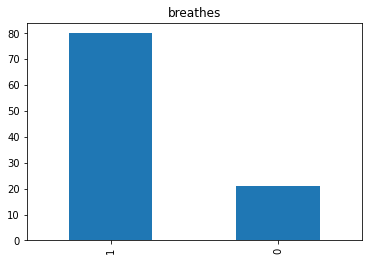

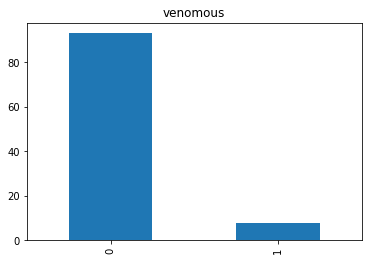

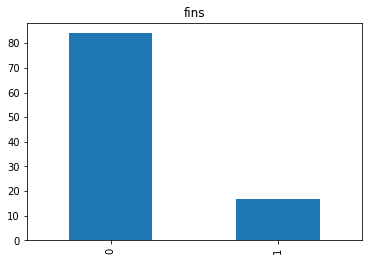

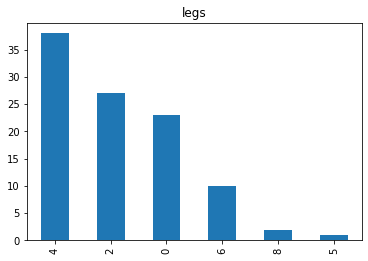

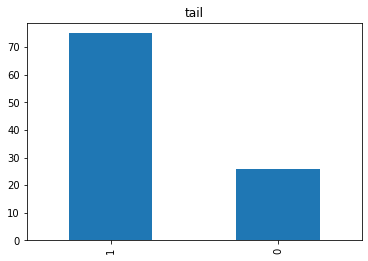

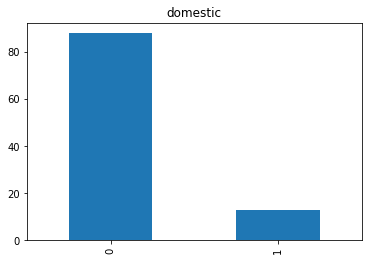

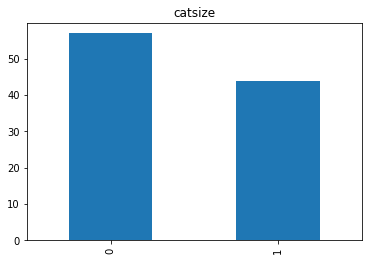

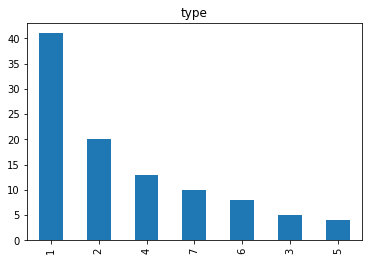

In [5]:
columns=['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']
 
for i in columns:
  df[i].value_counts().plot.bar()
  plt.title(i)                                                
  plt.show()


      



In [6]:
x=df.iloc[:,1:-1]
y=df["type"]

In [7]:
x

hair  feathers  eggs  milk  airborne  ...  fins  legs  tail  domestic  catsize
0       1         0     0     1         0  ...     0     4     0         0        1
1       1         0     0     1         0  ...     0     4     1         0        1
2       0         0     1     0         0  ...     1     0     1         0        0
3       1         0     0     1         0  ...     0     4     0         0        1
4       1         0     0     1         0  ...     0     4     1         0        1
..    ...       ...   ...   ...       ...  ...   ...   ...   ...       ...      ...
96      1         0     0     1         0  ...     0     2     1         0        1
97      1         0     1     0         1  ...     0     6     0         0        0
98      1         0     0     1         0  ...     0     4     1         0        1
99      0         0     1     0         0  ...     0     0     0         0        0
100     0         1     1     0         1  ...     0     2     1         0        0

[101 rows x 16 columns]

In [8]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

Using train test split method for accurancy.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train,y_train)
predict=model1.predict(X_test)
accr=np.mean(predict==y_test)
accr 

0.9705882352941176

Using Kfold method for better training.

In [10]:
num_folds = 5
kfold = KFold(n_splits=5)
model = KNeighborsClassifier(n_neighbors=5)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8614285714285714


### Grid Search for Algorithm hyperparameter Tuning

In [11]:
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(1,41))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40])}

In [12]:
model = KNeighborsClassifier()

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [13]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


Taking n_neighbors = 1

In [14]:
num_folds = 5
kfold = KFold(n_splits=5)
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, x, y, cv=kfold)
print("Accurancy is",results.mean()*100,"%")

Accurancy is 95.0 %
